#### TSF GRIP - Task No. 3 - EDA on Sample Super Store Data
#### August 2021 Batch
#### CHINMAY KARVE

#### Importing Necessary Libraries 

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading Dataset

In [8]:
df = pd.read_csv('SampleSuperstore_Aug.csv')

#### Data Description & PreProcessing

In [9]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
df.shape

(9994, 13)

Dataset consists of : 9994 Rows & 13 Columns

In [11]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no null values present in the dataset.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Out of Thirteen columns; Three Columns are floating datatype, Two columns are Integer datatype and Eight columns are Object datatype.

In [15]:
df.duplicated().sum()

17

There are 17 duplicate observations in dataset, we will drop all those duplicate observations.

In [16]:
df.drop_duplicates(inplace=True)
df.shape

(9977, 13)

After dropping duplicate values, Dataset consists of : 9977 Rows & 13 Columns

##### We will drop Postal Code Column from Dataset as aforesaid column is not required in the model building.

In [47]:
df = df.drop(['Postal Code'], axis=1)
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### Exploratory Data Analysis (EDA)

Frequency distribution of continuous variables

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

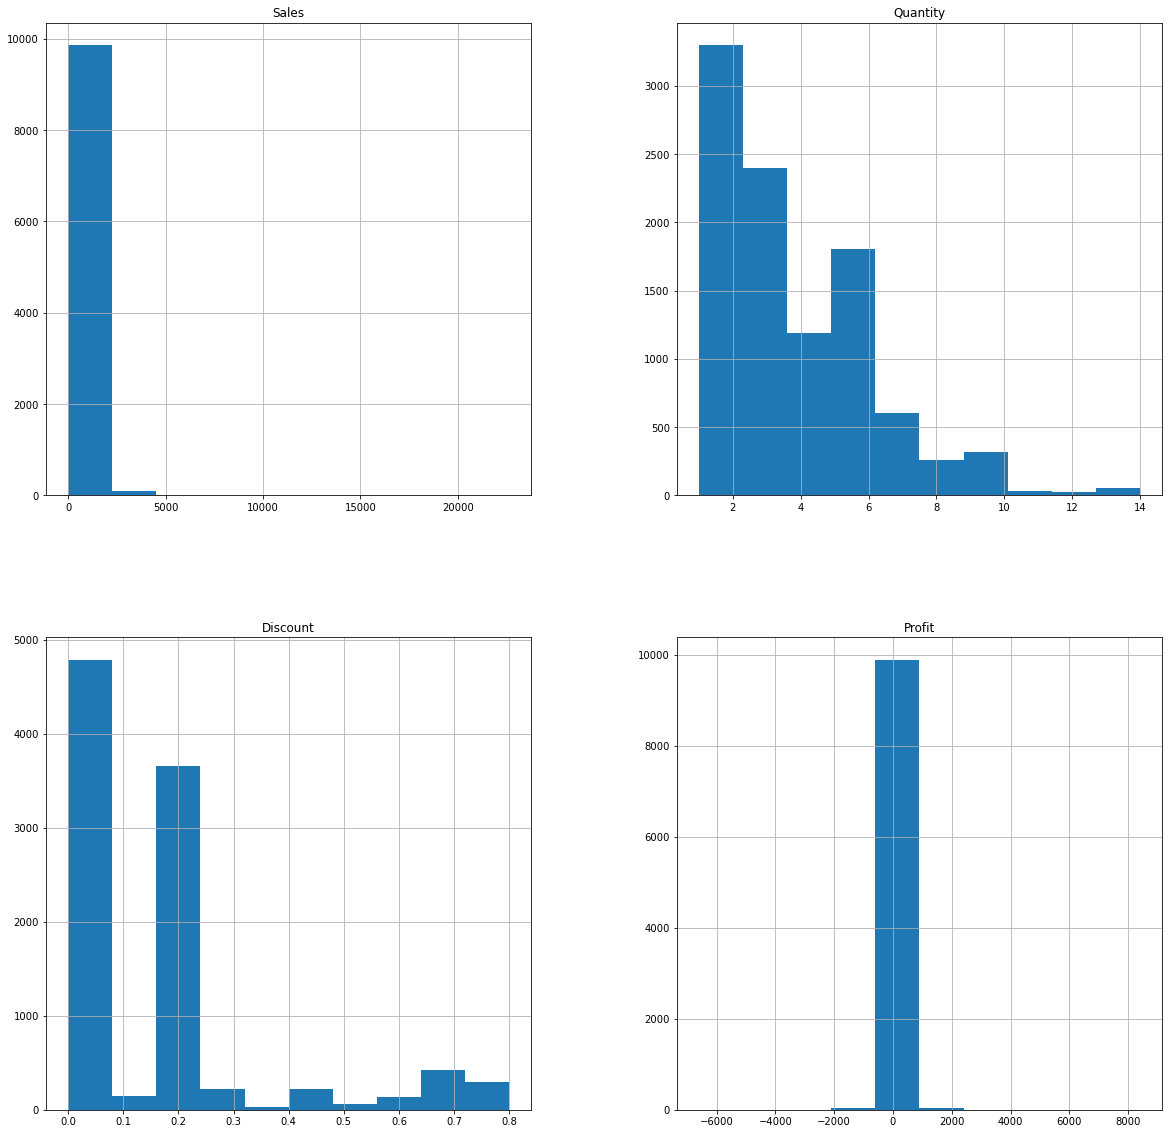

In [48]:
df.hist(figsize=(20,20))

Now we will see the skewness of data

In [49]:
from scipy.stats import stats
skewness = pd.DataFrame({'Skewness':[stats.skew(df.Sales), stats.skew(df.Quantity), stats.skew(df.Discount), stats.skew(df.Profit)]},index=['Sales','Quantity','Discount','Profit'])
skewness

,Skewness
Sales,12.961821
Quantity,1.276517
Discount,1.683132
Profit,7.553613


We could observe that Sales data is highly skewed followed by Profit.

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

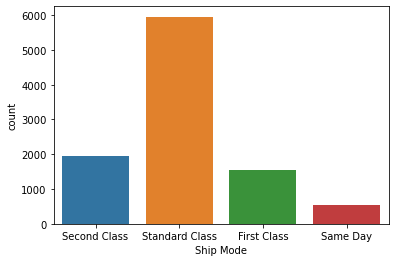

In [50]:
sns.countplot(x = df['Ship Mode'])

Standard Class ship mode has been used most of the time followed by Second Class Ship mode. Same Day ship mode is least used mode.

<AxesSubplot:xlabel='Segment', ylabel='count'>

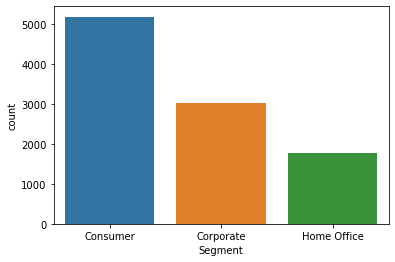

In [51]:
sns.countplot(x=df['Segment'])

Consumers make more purchases than corporate segment and home office segment

<AxesSubplot:xlabel='Category', ylabel='count'>

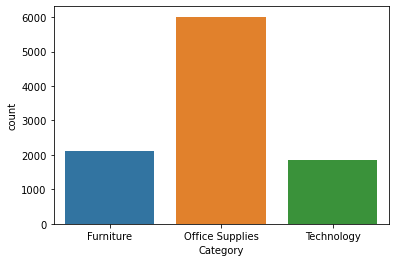

In [52]:
sns.countplot(x=df['Category'])

Office Supplies is the most sold category than Furniture & Technology

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

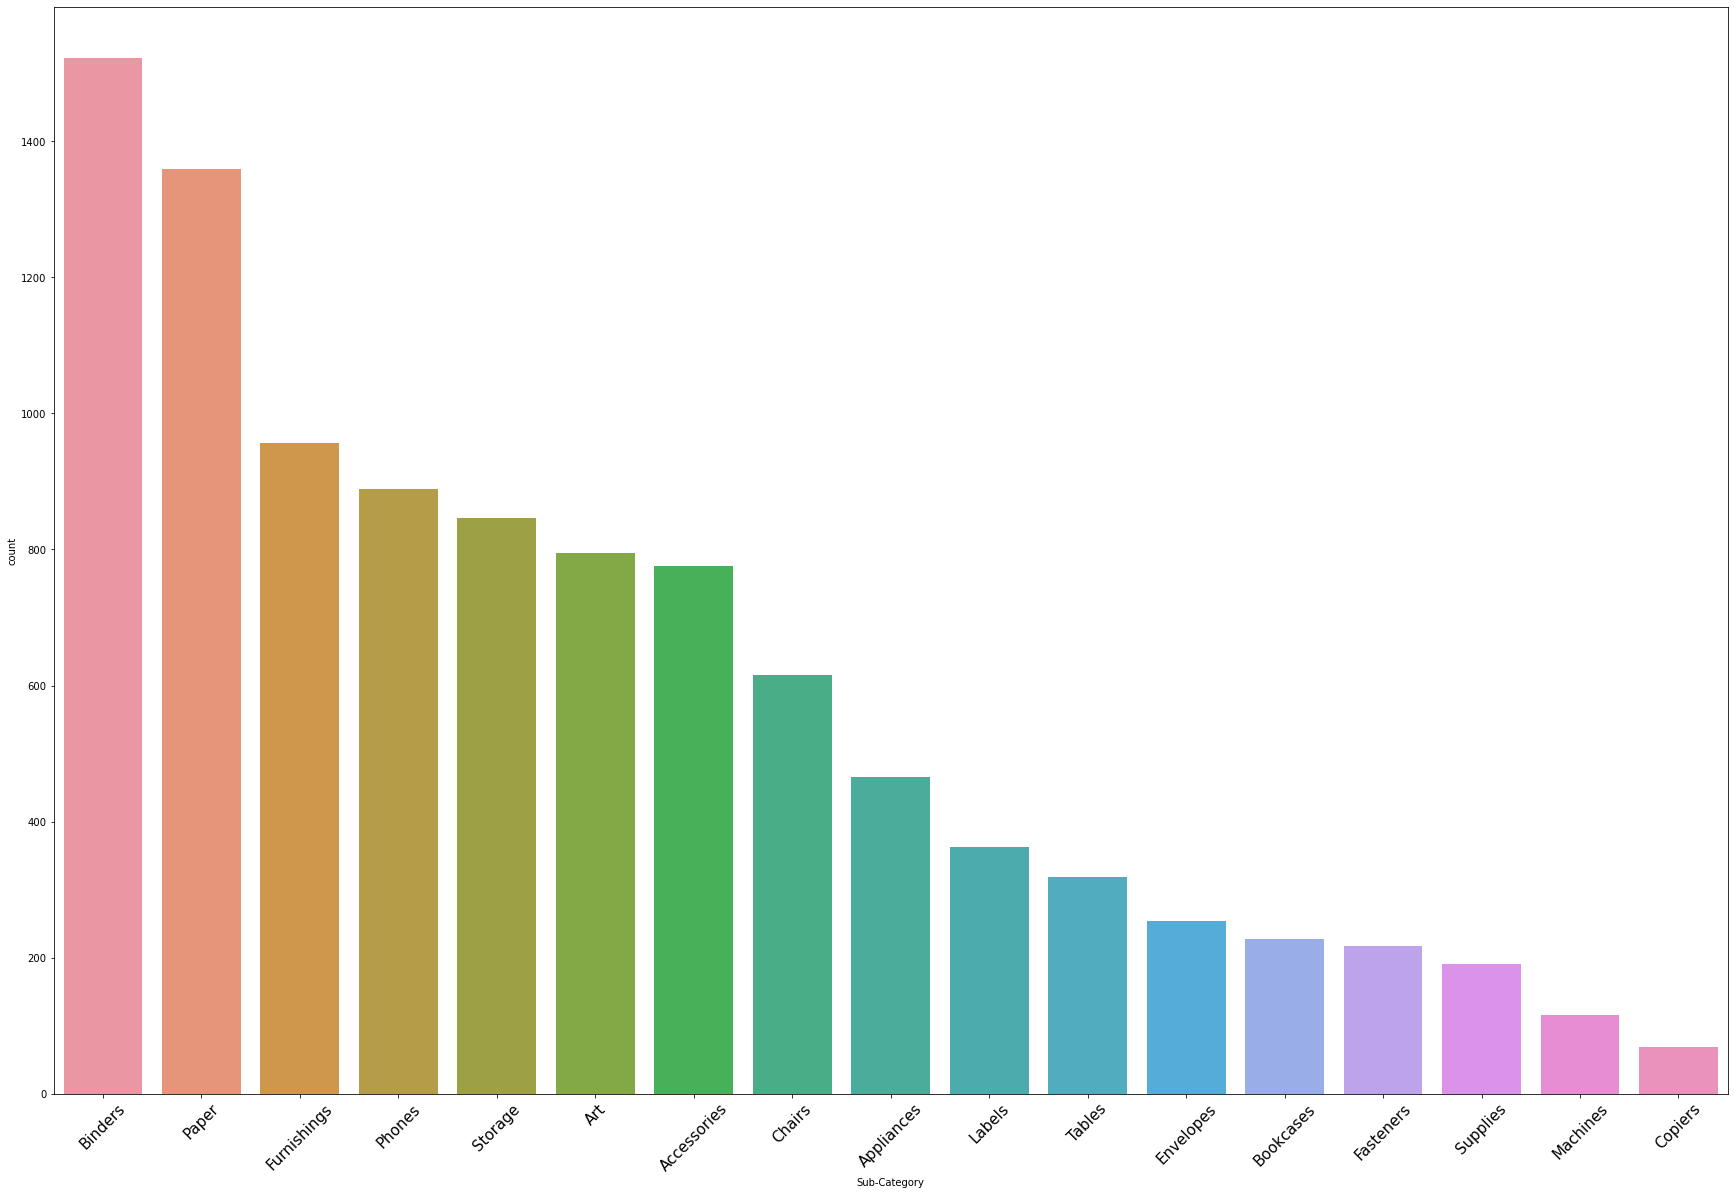

In [53]:
plt.figure(figsize=(30,20))
plt.xticks(rotation='45',fontsize=15)
sns.countplot(x=df['Sub-Category'], order=df['Sub-Category'].value_counts().index)

In sub-categories, we could see Binders are most sold item followed by Papers. Copiers is the least sold item. 

<AxesSubplot:xlabel='Region', ylabel='count'>

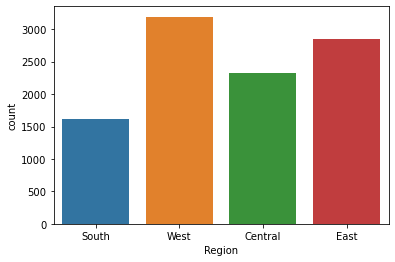

In [54]:
sns.countplot(x=df['Region'])

Most purchases done from West Region followed by East Region.

<AxesSubplot:xlabel='State', ylabel='count'>

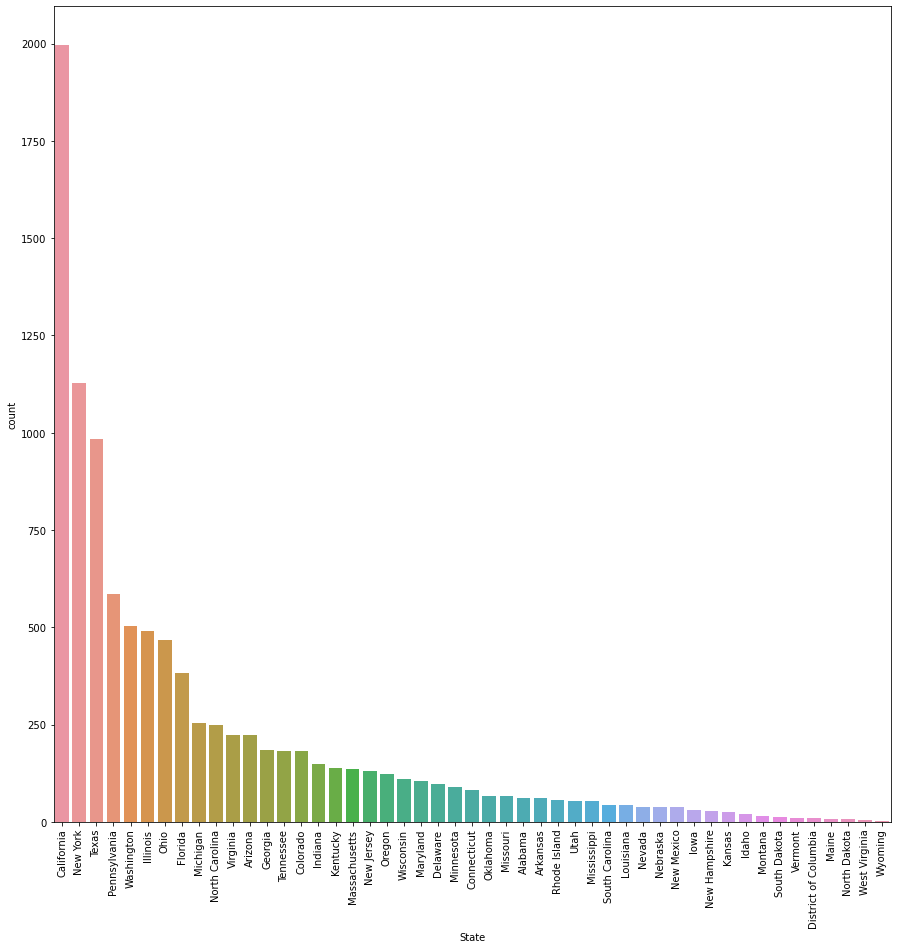

In [55]:
plt.figure(figsize=(15,15))
plt.xticks(rotation='90')
sns.countplot(x=df['State'], order=df['State'].value_counts().index)

California State has the most purchases and the Wyoming State has the least purchases.

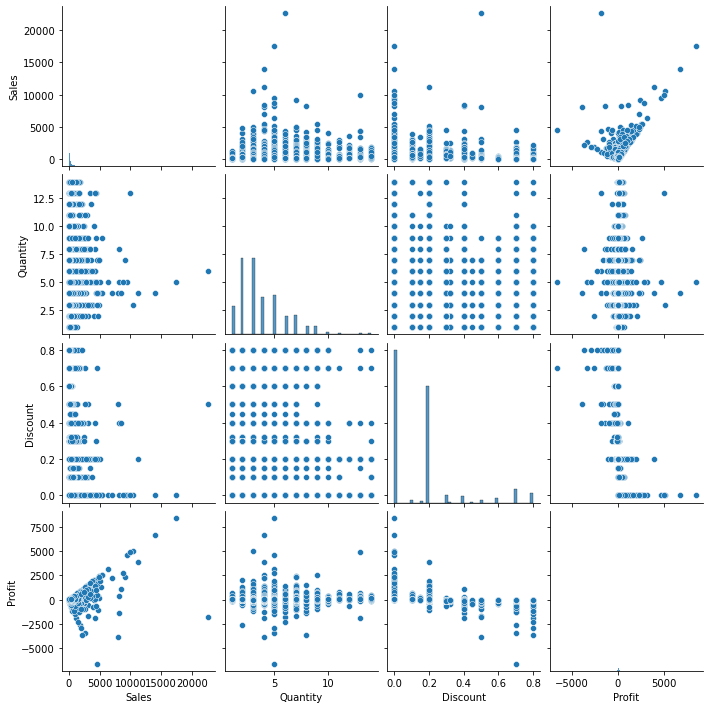

In [56]:
sns.pairplot(df)

From above pairplot, we could infer that only Sales and Profit have positive correlation.

<AxesSubplot:xlabel='Discount'>

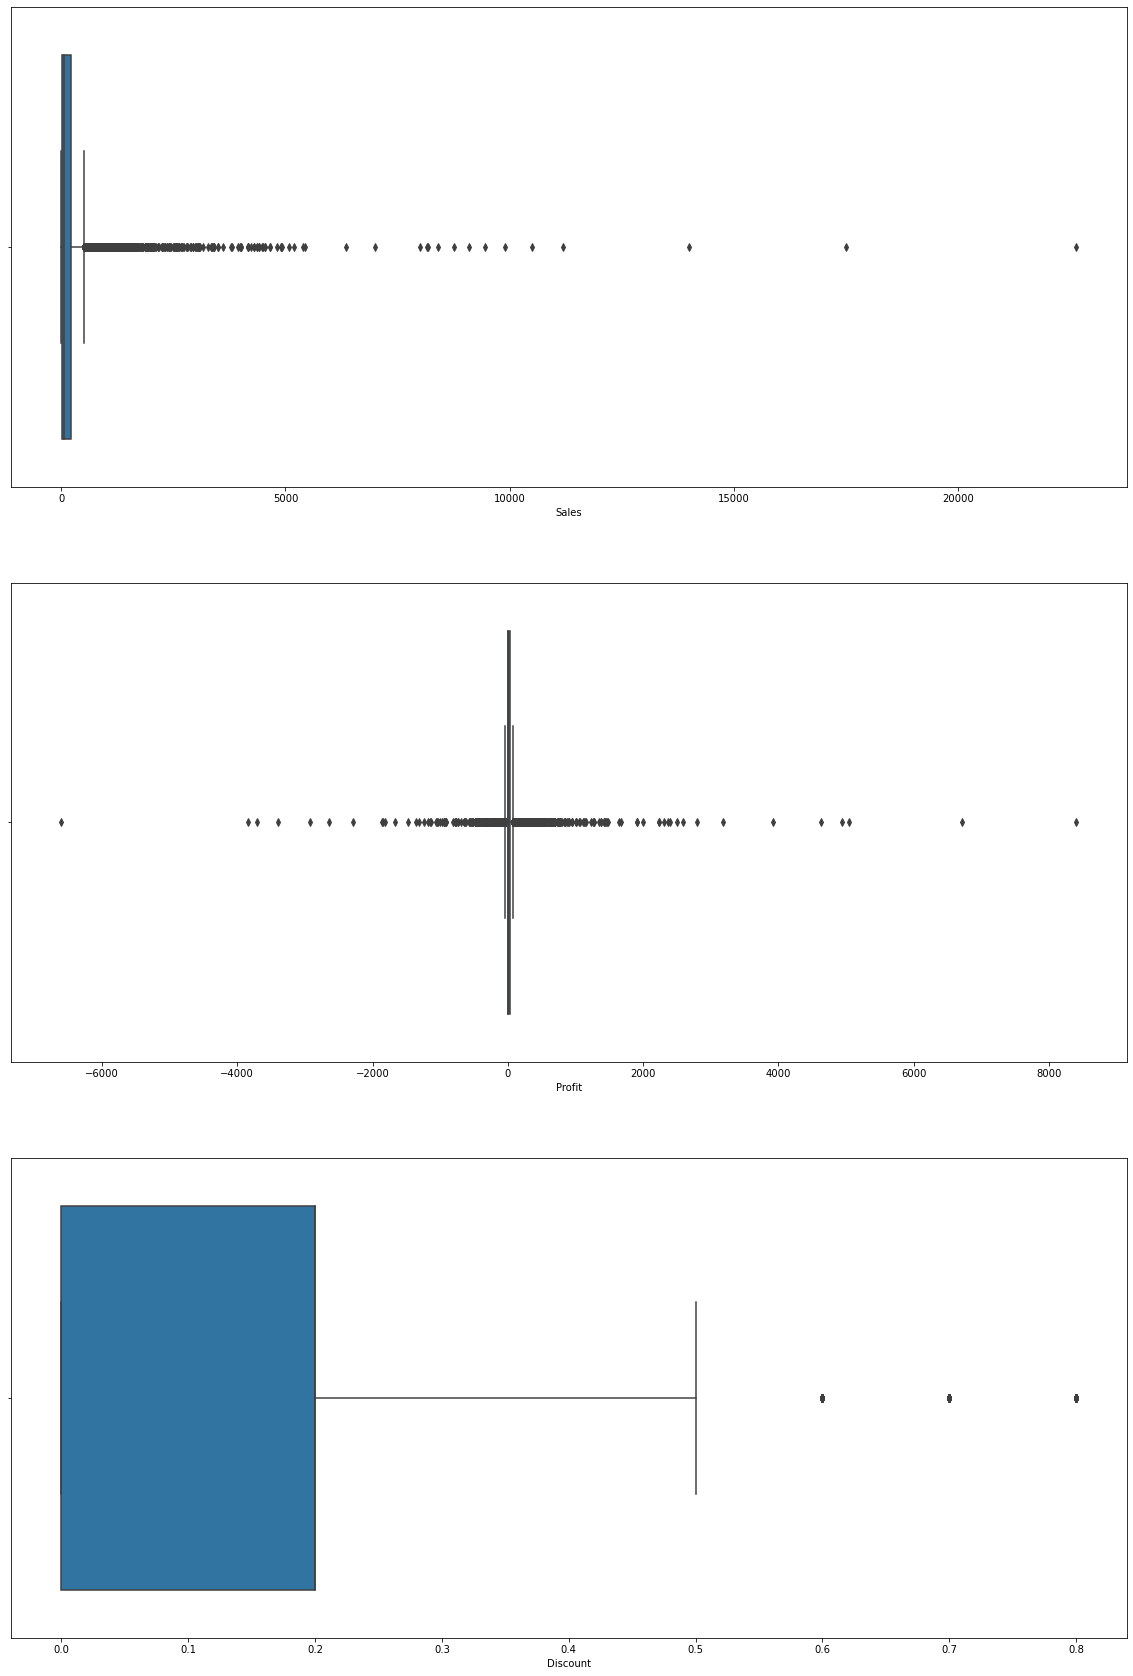

In [57]:
plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
sns.boxplot(x=df.Sales)
plt.subplot(3,1,2)
sns.boxplot(x=df.Profit)
plt.subplot(3,1,3)
sns.boxplot(x=df.Discount)

Sales, Profit and Discount columns have outliers.